# Exercise 11 - Convolutional Neural Network

### Tasks

* Familiarize yourself with PyTorch CNN syntax

In [12]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [13]:
!ls -l

total 148
-rw-r--r-- 1 root root 146119 Jul  2 04:03 Lucy.jpg
drwxr-xr-x 1 root root   4096 Jun 26 13:35 sample_data


data preparation

In [14]:
image = Image.open("Lucy.jpg")
data = np.asarray(image)
print("shape of data:", data.shape)

rgbWeights = [0.2989, 0.5870, 0.1140]
data = np.dot(data[..., :3], rgbWeights)  # convert to gray scale
print("shape of data:", data.shape)

data = torch.from_numpy(data).unsqueeze(0).unsqueeze(0).to(torch.float32)
print("shape of data:", data.shape)

shape of data: (612, 734, 3)
shape of data: (612, 734)
shape of data: torch.Size([1, 1, 612, 734])


helper function, which converts torch tensors to filters (models consisting of a single convolutional filter)

In [15]:
def makeFilter(input):
    filter = torch.nn.Conv2d(
        1, 1, kernel_size=input.shape[-1], stride=1, padding=0, bias=False
    )  # assumes a square filter
    filter.weight.data = input
    return filter

original image

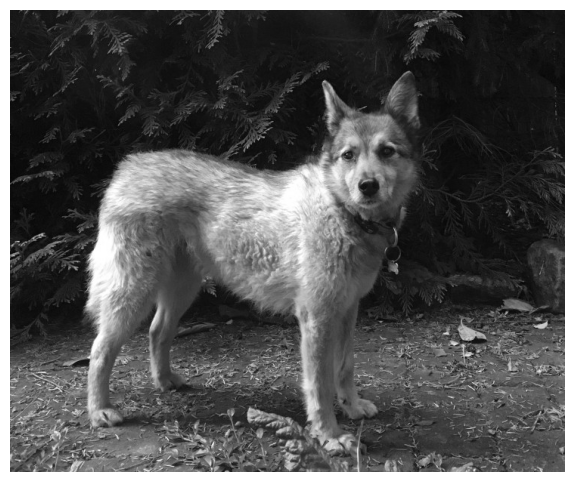

In [16]:
plt.figure(figsize=(12, 6))
plt.imshow(data.squeeze(), cmap="gray")
plt.axis("off")
plt.show()

apply a 3x3 Gaussian filter to the image

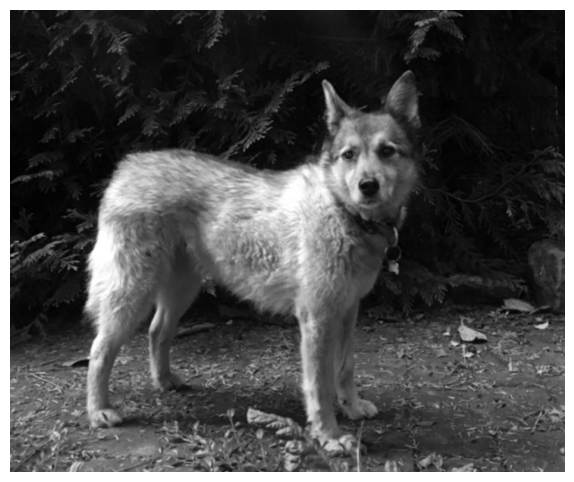

In [17]:
gaussianFilter3By3 = makeFilter(
    torch.tensor([[[[1.0, 2.0, 1.0], [2.0, 4.0, 2.0], [1.0, 2.0, 1.0]]]]) / 16.0
)

output = gaussianFilter3By3(data).detach()

plt.figure(figsize=(12, 6))
plt.imshow(output.squeeze(), cmap="gray")
plt.axis("off")
plt.show()

apply a 5x5 Gaussian filter to the image

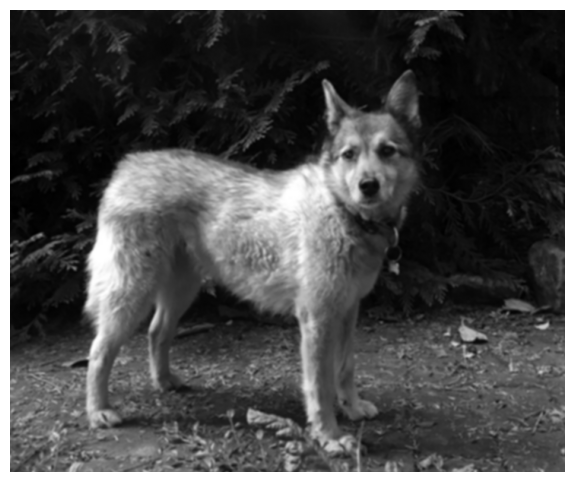

In [18]:
gaussianFilter5By5 = makeFilter(
    torch.tensor(
        [
            [
                [
                    [2.0, 4.0, 5.0, 4.0, 2.0],
                    [4.0, 9.0, 12.0, 9.0, 4.0],
                    [5.0, 12.0, 15.0, 12.0, 5.0],
                    [4.0, 9.0, 12.0, 9.0, 4.0],
                    [2.0, 4.0, 5.0, 4.0, 2.0],
                ]
            ]
        ]
    )
    / 159.0
)

output = gaussianFilter5By5(data).detach()

plt.figure(figsize=(12, 6))
plt.imshow(output.squeeze(), cmap="gray")
plt.axis("off")
plt.show()

apply a Sobel filter in the x-direction to obtain that discreet derivative to the image

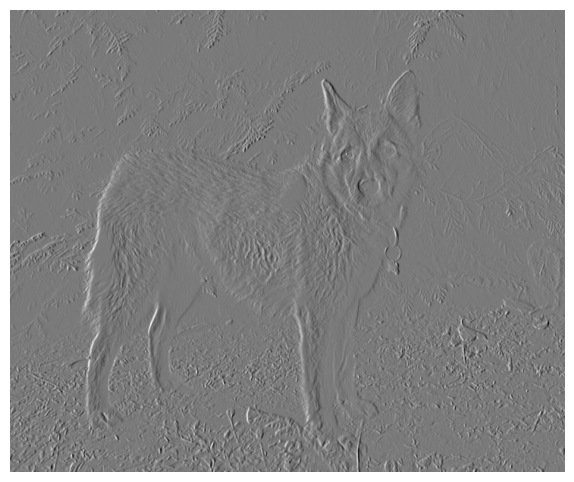

In [19]:
sobelxFilter = makeFilter(
    torch.tensor([[[[-1.0, 0.0, 1.0], [-2.0, 0.0, 2.0], [-1.0, 0.0, 1.0]]]])
)

outputx = sobelxFilter(data).detach()

plt.figure(figsize=(12, 6))
plt.imshow(outputx.squeeze(), cmap="gray")
plt.axis("off")
plt.show()

apply a Sobel filter in the y-direction to obtain that discreet derivative to the image

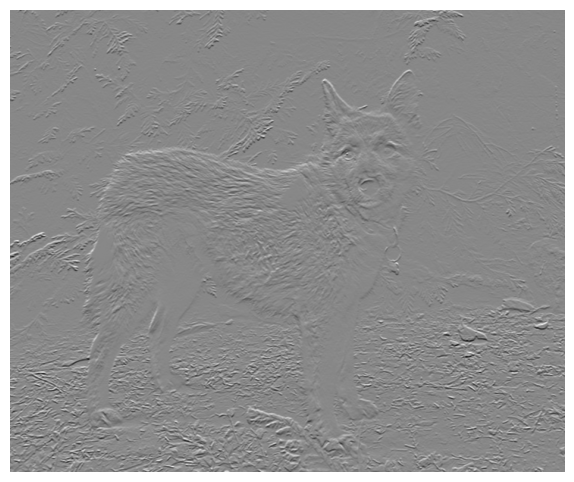

In [20]:
sobelyFilter = makeFilter(
    torch.tensor([[[[-1.0, -2.0, -1.0], [0.0, 0.0, 0.0], [1.0, 2.0, 1.0]]]])
)

outputy = sobelyFilter(data).detach()

plt.figure(figsize=(12, 6))
plt.imshow(outputy.squeeze(), cmap="gray")
plt.axis("off")
plt.show()

get the gradient magnitude from the image

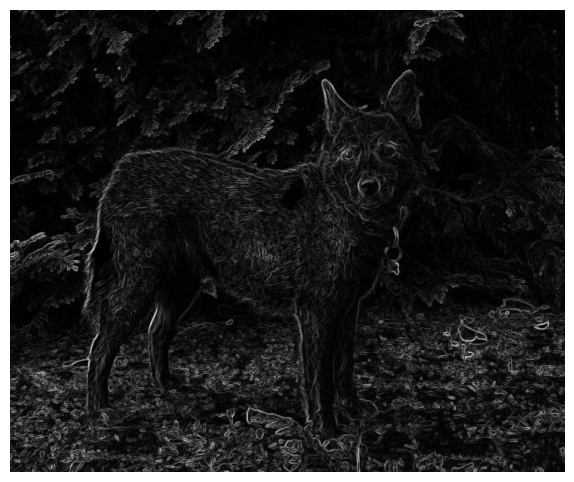

In [21]:
gradientMagnitude = torch.sqrt(outputx ** 2 + outputy ** 2)

plt.figure(figsize=(12, 6))
plt.imshow(gradientMagnitude.squeeze(), cmap="gray")
plt.axis("off")
plt.show()